# Load packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Load data

In [2]:
path = os.getcwd()
data = path + '/dataset/bank/bank-full.csv'
df = pd.read_csv(data, sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data preprocessing

Here we process the data before giving it to our models.

In [4]:
# Assign labels for different age groups
df.loc[(df['age'] >= 18) & (df['age'] <= 40), 'age'] = 1
df.loc[(df['age'] >= 40) & (df['age'] < 60), 'age'] = 2
df.loc[df['age'] >= 60, 'age'] = 3

# Assign lables for different durations
df['duration'] = pd.cut(df['duration'], bins=[0, 5, 10, float('inf')], labels=[1, 2, 3])
df['duration'] = df['duration'].astype('category')

# Replace 999 with 0 and 1
df["pdays"] = df["pdays"].apply(lambda x: 0 if x == 999 else 1)

# Convert pdays to a factor
df["pdays"] = pd.Categorical(df["pdays"])

In [5]:
# Split data into features and target variable
X = df.drop('y', axis=1)
y = df['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Select categorical features to be one-hot encoded
categorical_features = ['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False)
encoded_categorical_features = encoder.fit_transform(df[categorical_features])

# Replace categorical features in the dataframe with the encoded features
df.drop(categorical_features, axis=1, inplace=True)
encoded_feature_names = encoder.get_feature_names(categorical_features)
df[encoded_feature_names] = encoded_categorical_features

/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [7]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,2,2143,5,3,1,1,0,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,29,5,3,1,1,0,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,2,5,3,1,1,0,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,1506,5,3,1,1,0,no,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,1,5,3,1,1,0,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
# Drop na values
df.dropna(inplace=True)

In [9]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], test_size=0.2, random_state=42)

# Machine learning models

Now we are ready to implement machine learning models and fit them to our data.

In [10]:
# Implement different classifiers and compute cross-validation scores

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = neural_scores.mean()

/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/vikas

The resulting table shows that the Gradient Boosting Classifier has the highest mean cross-validation score.

In [11]:
# Create a Dataframe with the results
d = {'Classifier': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad Boost CLF', 'Random Forest', 'Neural Classifier', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifier,Crossval Mean Scores
4,Grad Boost CLF,0.893768
5,Random Forest,0.886772
0,Logistic Reg.,0.884118
1,SVC,0.883012
2,KNN,0.874440
3,Dec Tree,0.829702
6,Neural Classifier,0.824723
7,Naives Bayes,0.824723


# Fitting and Evaluating Models

At this stage, we should try fitting and evaluating our models to our data. We will explore the following three models in more depth:

1. Gradient Boosting Classifier
2. Random Forest Classifier
3. Logistic Regression Classifier

## Gradient Boosting Classifier

### Fit the model and evaulate the performance

In [12]:
# Initialize the gradient boosting classifier
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
gbc.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = gbc.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      7985
         yes       0.69      0.21      0.32      1057

    accuracy                           0.90      9042
   macro avg       0.80      0.60      0.63      9042
weighted avg       0.88      0.90      0.87      9042



### Create confusion matrix

In [13]:
# Make predictions on the test dataset using the trained gradient boosting model
y_pred = gbc.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('[[true negative  false positive]')
print('[false negative  true positive]]')
print(cm)

[[true negative  false positive]
[false negative  true positive]]
[[7888   97]
 [ 840  217]]


## Random Forest Classifier

### Fit the model and evaulate the performance

In [14]:
# Initialize the random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rfc.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7985
         yes       0.61      0.24      0.35      1057

    accuracy                           0.89      9042
   macro avg       0.76      0.61      0.64      9042
weighted avg       0.87      0.89      0.87      9042



### Create confusion matrix

In [15]:
# Make predictions on the test dataset using the trained random forest model
y_pred = rfc.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('[[true negative  false positive]')
print('[false negative  true positive]]')
print(cm)

[[true negative  false positive]
[false negative  true positive]]
[[7822  163]
 [ 802  255]]


### Using the random forest classifier to determine importance of features

The resulting visualization shows that the balance is the most important feature.

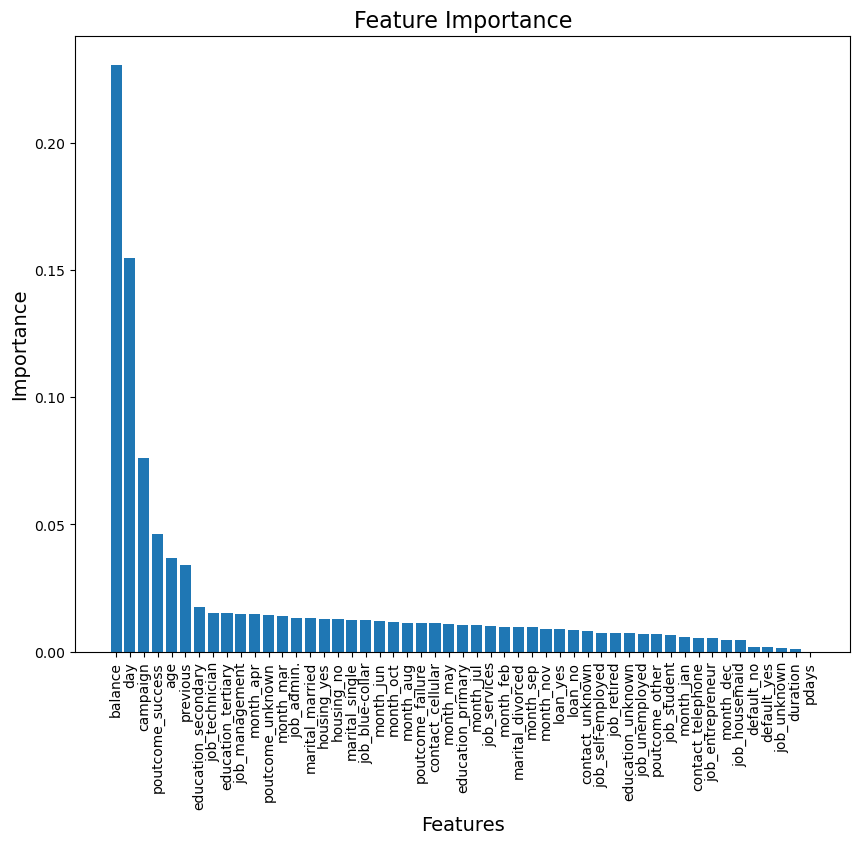

In [16]:
# Get feature importances
importances = rfc.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.show()

## Logistic Regression Classifier

### Fit the model and evaulate the performance

In [17]:
# Fit logistic regression model on the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict target variable for the test data
y_pred = lr.predict(X_test)

# Evaluate model performance using classification report
print(classification_report(y_test, y_pred))

/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

          no       0.88      1.00      0.94      7985
         yes       0.50      0.00      0.01      1057

    accuracy                           0.88      9042
   macro avg       0.69      0.50      0.47      9042
weighted avg       0.84      0.88      0.83      9042



### Create confusion matrix

In [18]:
# Make predictions on the test dataset using the trained logistic regression model
prob_pred = lr.predict_proba(X_test)[:, 1]
y_pred = np.where(prob_pred > 0.5, 'yes', 'no')

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('[[true negative  false positive]')
print('[false negative  true positive]]')
print(cm)

[[true negative  false positive]
[false negative  true positive]]
[[7981    4]
 [1053    4]]
